<a href="https://colab.research.google.com/github/yalex1402/AI_Course/blob/master/Sample1_UninformedSearch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exercise 1: Uninformed Search Part 1**

***By: Yesid A. Garcia***

Analicemos y trabajemos. Dado el problema de la figura anexa, trabaje sobre la formulación del problema en términos de:
- Estados
- Acciones
- Función de sucesión
- Objetivo
- Costo de ruta

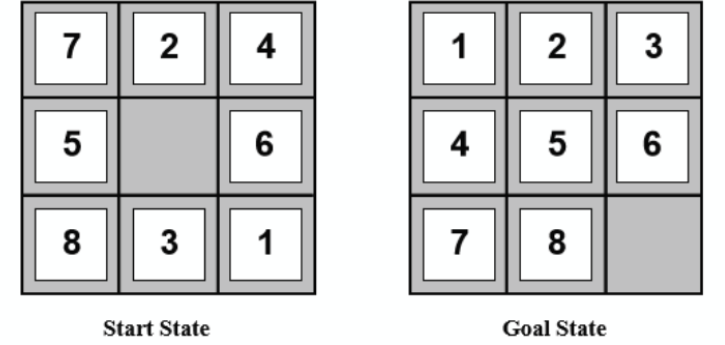

Se inicia el ejercicio declarando el estado inicial:


In [ ]:
 #Generate Matrix m*n
def GenerateMatrix(nrows, ncolumns):
    matrix = []
    row=[]
    i = 0
    while i < nrows:
        j=0
        row=[]
        while j < ncolumns:
            row.append(int(input("Enter the number in position X" + str(i) + "," + str(j) + ": ")))
            j+=1
        matrix.append(row)
        i+=1
    return matrix

#If you need generate any matrix m*n use this:
#NUMBER_ROWS = int(input("Enter the number of rows: \n"))
#NUMBER_COLUMNS = int(input("Enter the number of rows: \n")) 
#GenerateMatrix(NUMBER_ROWS, NUMBER_COLUMNS) 

NUMBER_ROWS = 3
NUMBER_COLUMNS = 3
initialMatrix = [[7 , 2 , 4] , [5 , -1 , 6] , [8 , 3 , 1]]

#Identify where is the value -1 (it's a representation of white space)
def SearchWhiteSpace(matrix):
    position = {"i" : 0 , "j" : 0}
    for row in matrix:
        position["j"] = 0
        for element in row:
            if element == -1:
                return position
            position["j"] += 1
        position["i"] += 1
 
#Define if any position is into the valid positions of the matrix
def IsValidPosition(position, nrows, ncolumns):
    if (position["i"] >= 0 and position["i"] < nrows) and (position["j"] >= 0 and position["j"] < ncolumns):
        return True
    return False

'''
The objective of each method that starts with MoveTo adds or subtract into rows or columns.
MoveValueTo are methods that generate the new matrix
'''
def MoveToRight (column):
    column += 1
    return column

def MoveValueToRight(matrix, wsPosition):
    selectedRow = matrix[wsPosition["i"]]
    aux = selectedRow[wsPosition["j"]]
    selectedRow[wsPosition["j"]] = selectedRow[wsPosition["j"]+1]
    selectedRow[wsPosition["j"]+1] = aux
    matrix[wsPosition["i"]] = selectedRow
    print(matrix)
    selectedRow[wsPosition["j"]+1] = selectedRow[wsPosition["j"]]
    selectedRow[wsPosition["j"]] = aux
    matrix[wsPosition["i"]] = selectedRow
    
def MoveToLeft (column):
    column -= 1
    return column

def MoveValueToLeft(matrix, wsPosition):
    selectedRow = matrix[wsPosition["i"]]
    aux = selectedRow[wsPosition["j"]]
    selectedRow[wsPosition["j"]] = selectedRow[wsPosition["j"]-1]
    selectedRow[wsPosition["j"]-1] = aux
    matrix[wsPosition["i"]] = selectedRow
    print(matrix)
    selectedRow[wsPosition["j"]-1] = selectedRow[wsPosition["j"]]
    selectedRow[wsPosition["j"]] = aux
    matrix[wsPosition["i"]] = selectedRow

def MoveToUp (row):
    row -= 1
    return row

def MoveValueToUp(matrix, wsPosition):
    selectedRow = matrix[wsPosition["i"]]
    beforeRow = matrix[wsPosition["i"]-1]
    aux = selectedRow[wsPosition["j"]]
    selectedRow[wsPosition["j"]] = beforeRow[wsPosition["j"]]
    beforeRow[wsPosition["j"]] = aux
    matrix[wsPosition["i"]] = selectedRow
    matrix[wsPosition["i"]-1] = beforeRow
    print(matrix)
    beforeRow[wsPosition["j"]] = selectedRow[wsPosition["j"]]
    selectedRow[wsPosition["j"]] = aux
    matrix[wsPosition["i"]] = selectedRow
    matrix[wsPosition["i"]-1] = beforeRow

def MoveToDown (row):
    row += 1
    return row

def MoveValueToDown(matrix, wsPosition):
    selectedRow = matrix[wsPosition["i"]]
    afterRow = matrix[wsPosition["i"]+1]
    aux = selectedRow[wsPosition["j"]]
    selectedRow[wsPosition["j"]] = afterRow[wsPosition["j"]]
    afterRow[wsPosition["j"]] = aux
    matrix[wsPosition["i"]] = selectedRow
    matrix[wsPosition["i"]+1] = afterRow
    print(matrix)
    afterRow[wsPosition["j"]] = selectedRow[wsPosition["j"]]
    selectedRow[wsPosition["j"]] = aux
    matrix[wsPosition["i"]] = selectedRow
    matrix[wsPosition["i"]+1] = afterRow


Luego se procede a llamar a la función *GeneratePossibleMatrixes*, esta se encarga de validar que movimientos son permitidos y generar los diferentes movimientos que se pueden elegir.

In [ ]:
#This method creates the possibilities to choose the next movement
def GeneratePossibleMatrixes(matrix, nrows, ncolumns):
    originalPosition = SearchWhiteSpace(matrix)
    newPoint = { "i": MoveToUp(originalPosition["i"]), "j":originalPosition["j"]}
    if IsValidPosition(newPoint,nrows, ncolumns):
        print("Moving to Up")
        MoveValueToUp(matrix, originalPosition)
    newPoint = { "i": MoveToDown(originalPosition["i"]), "j":originalPosition["j"]}
    if IsValidPosition(newPoint,nrows, ncolumns):
        print("Moving to Down")
        MoveValueToDown(matrix, originalPosition)
    newPoint = { "i": originalPosition["i"] ,"j": MoveToRight(originalPosition["j"])}
    if IsValidPosition(newPoint,nrows, ncolumns):
        print("Moving to right")
        MoveValueToRight(matrix, originalPosition)
    newPoint = { "i": originalPosition["i"] ,"j": MoveToLeft(originalPosition["j"])}
    if IsValidPosition(newPoint,nrows, ncolumns):
        print("Moving to left")
        MoveValueToLeft(matrix, originalPosition)
    
GeneratePossibleMatrixes(initialMatrix,NUMBER_ROWS,NUMBER_COLUMNS)

Moving to Up
[[7, -1, 4], [5, 2, 6], [8, 3, 1]]
Moving to Down
[[7, 2, 4], [5, 3, 6], [8, -1, 1]]
Moving to right
[[7, 2, 4], [5, 6, -1], [8, 3, 1]]
Moving to left
[[7, 2, 4], [-1, 5, 6], [8, 3, 1]]


Esto se convierte en un ciclo donde la eleccion que se haga, se convierte en la matriz que se debe enviar nuevamente al metodo *GeneratePossibleMatrixes*